In [1]:
#ANN with softmax output
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import keras 
import tensorflow as tf
import sklearn.metrics as metrics
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  

In [2]:
col_names = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','RainY0','RainN0']
dataset=pd.read_csv("D:/data/tan/train_ANN1.csv",header=None,names=col_names)

In [3]:
dataset.head()

,Frost_pt,Temp_MAX,Temp_MIN,Specific_Hum,Relative_Hum,Winds_Max,Winds_Min,RainY0,RainN0
0,0.40,19.01,7.75,4.03,46.31,1.68,0.44,0,1
1,0.89,20.65,8.19,4.21,43.44,1.91,0.69,0,1
2,1.78,21.88,9.58,4.58,46.19,3.71,0.72,1,0
3,5.84,21.40,7.73,5.92,64.12,4.48,1.26,0,1
4,3.69,19.09,5.12,5.13,62.69,2.29,0.28,0,1


In [4]:
#dataset.info()

In [5]:
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
X = dataset.iloc[:, 0:7].values  
#print(X)

In [6]:
y = dataset.iloc[:,7:9].values

#print(y

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [8]:

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)



In [9]:
classifier = Sequential()   
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7)) 
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu')) 
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 384, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 384, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 384, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 384, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [11]:
history=classifier.fit(X_train, y_train, batch_size = 32, epochs = 1000)  

Epoch 1/1000
103/103 [==============================] - 2s 7ms/step - loss: 0.6332 - accuracy: 0.6723
Epoch 2/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.4399 - accuracy: 0.8150
Epoch 3/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.4194 - accuracy: 0.8263
Epoch 4/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.4039 - accuracy: 0.8363
Epoch 5/1000
103/103 [==============================] - 1s 8ms/step - loss: 0.3911 - accuracy: 0.8409
Epoch 6/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.4001 - accuracy: 0.8430
Epoch 7/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.3763 - accuracy: 0.8448
Epoch 8/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.3686 - accuracy: 0.8497
Epoch 9/1000
103/103 [==============================] - 1s 8ms/step - loss: 0.3628 - accuracy: 0.8485
Epoch 10/1000
103/103 [==============================] - 1s 7ms/step - loss: 0.365

In [12]:
score, acc = classifier.evaluate(X_train, y_train, batch_size=32)
print('Train score:', score)
print('Train accuracy:', acc)

103/103 [==============================] - 1s 4ms/step - loss: 0.1431 - accuracy: 0.9483
Train score: 0.14314010739326477
Train accuracy: 0.9482811093330383


In [13]:
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

35/35 [==============================] - 0s 4ms/step


In [14]:
y_pred[:,0] = (y_pred[:,0] > 0.5)  
y_pred[:,1] = (y_pred[:,1] > 0.5) 
 

In [15]:
print(y_pred[:,0])
print(y_test[:,0])

[1. 1. 1. ... 1. 1. 0.]
[1 1 1 ... 1 1 0]


In [16]:
from sklearn.metrics import confusion_matrix  
yy_test=y_test[:,0]
yy_pred=y_pred[:,0]
cm1 = confusion_matrix(yy_test,yy_pred )  

Rainy day prediction
[[563 115]
 [ 70 348]]


Text(0.5, 1.0, 'Naive-bayes (Model-ANN-0)')

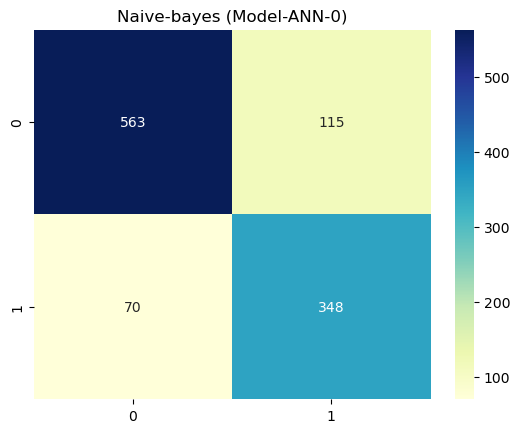

In [17]:
print( "Rainy day prediction")
print(cm1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["Rain", "Not Rain"]
#cm=confusion_matrix(y_test, predicted_rain_states)
sns.heatmap(pd.DataFrame(cm1),annot=True,cmap="YlGnBu",fmt='g')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#disp.plot();
plt.title('Naive-bayes (Model-ANN-0)')

In [18]:
from sklearn.metrics import confusion_matrix  
yy_test=y_test[:,1]
yy_pred=y_pred[:,1]
cm0 = confusion_matrix(yy_test,yy_pred ) 

No Rainy day prediction
[[348  70]
 [115 563]]


Text(0.5, 1.0, 'Naive-bayes (Model-ANN-0)')

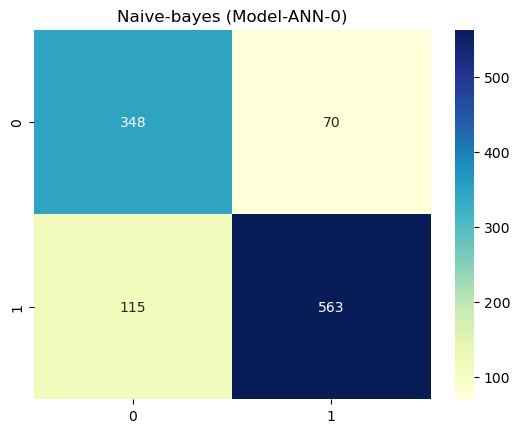

In [19]:
print("No Rainy day prediction")
print(cm0)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["Rain", "Not Rain"]
#cm=confusion_matrix(y_test, predicted_rain_states)
sns.heatmap(pd.DataFrame(cm0),annot=True,cmap="YlGnBu",fmt='g')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#disp.plot();
plt.title('Naive-bayes (Model-ANN-0)')

In [20]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

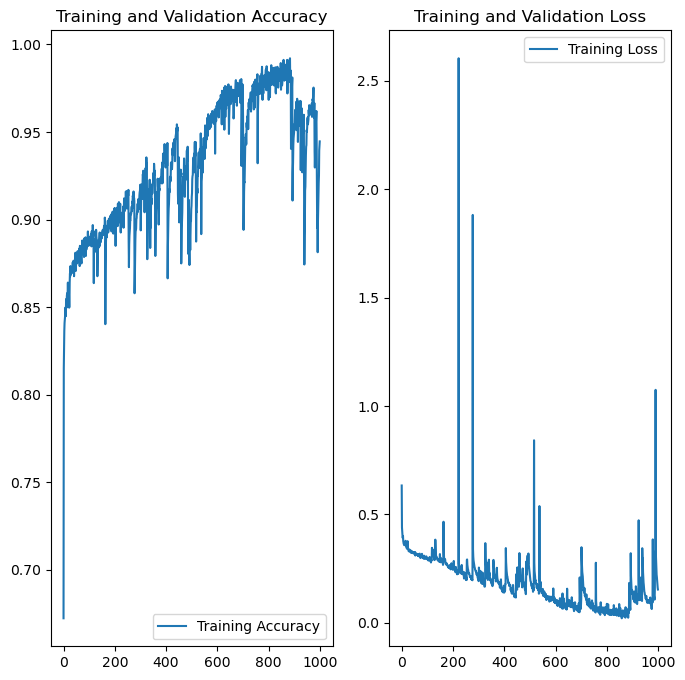

In [21]:
EPOCHS=1000
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
#plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
#plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:

#Jan
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i01J.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Jan")
print(df1)


1/1 [==============================] - 0s 27ms/step
Jan
    Actual  Predicted
0        0        1.0
1        0        0.0
2        0        0.0
3        0        0.0
4        1        1.0
5        1        1.0
6        0        1.0
7        1        1.0
8        1        1.0
9        1        1.0
10       1        0.0
11       0        1.0
12       0        1.0
13       0        1.0
14       0        1.0
15       0        1.0
16       0        1.0
17       0        1.0
18       0        1.0
19       1        1.0
20       0        1.0
21       1        1.0
22       1        1.0
23       1        1.0
24       1        1.0
25       0        1.0
26       0        1.0
27       0        1.0
28       0        1.0
29       0        0.0
30       0        0.0


In [23]:
#Feb
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i02F.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Feb")
print(df1)

1/1 [==============================] - 0s 47ms/step
Feb
    Actual  Predicted
0        0        1.0
1        0        0.0
2        1        1.0
3        1        1.0
4        0        0.0
5        0        0.0
6        0        1.0
7        1        1.0
8        1        1.0
9        0        1.0
10       0        0.0
11       0        0.0
12       0        0.0
13       0        1.0
14       0        0.0
15       0        1.0
16       0        0.0
17       0        0.0
18       0        0.0
19       0        0.0
20       0        1.0
21       0        0.0
22       0        1.0
23       0        0.0
24       0        0.0
25       1        1.0
26       0        0.0
27       0        0.0


In [24]:
#Mar
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i03M.csv" ,header=None,names=col_names1)
X01J = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)

y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Mar")
print(df1)

1/1 [==============================] - 0s 47ms/step
Mar
    Actual  Predicted
0        0        0.0
1        0        0.0
2        0        1.0
3        0        0.0
4        0        0.0
5        0        0.0
6        0        0.0
7        0        0.0
8        0        0.0
9        0        0.0
10       0        0.0
11       0        1.0
12       0        1.0
13       0        0.0
14       0        1.0
15       0        0.0
16       0        1.0
17       0        0.0
18       0        1.0
19       0        1.0
20       0        0.0
21       0        0.0
22       0        1.0
23       0        0.0
24       0        0.0
25       0        0.0
26       0        0.0
27       0        0.0
28       0        0.0
29       0        0.0
30       0        0.0


In [25]:
#Apr
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']

df01=pd.read_csv("D:/data/tan/i04A.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Apr")
print(df1)

1/1 [==============================] - 0s 31ms/step
Apr
    Actual  Predicted
0        0        0.0
1        0        0.0
2        0        0.0
3        0        0.0
4        0        0.0
5        0        0.0
6        0        0.0
7        0        0.0
8        0        0.0
9        0        0.0
10       0        0.0
11       0        0.0
12       0        1.0
13       0        0.0
14       0        0.0
15       0        0.0
16       0        0.0
17       0        0.0
18       0        0.0
19       0        0.0
20       0        0.0
21       0        1.0
22       0        0.0
23       0        0.0
24       0        0.0
25       0        0.0
26       0        0.0
27       0        0.0
28       0        0.0
29       0        0.0


In [26]:
#May
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']

df01=pd.read_csv("D:/data/tan/i05M.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("May")
print(df1)

1/1 [==============================] - 0s 31ms/step
May
    Actual  Predicted
0        0        0.0
1        0        1.0
2        0        1.0
3        1        1.0
4        1        1.0
5        0        1.0
6        0        1.0
7        1        1.0
8        1        1.0
9        1        1.0
10       1        0.0
11       1        1.0
12       1        0.0
13       0        0.0
14       0        0.0
15       0        0.0
16       1        0.0
17       0        0.0
18       0        0.0
19       1        0.0
20       1        0.0
21       1        1.0
22       1        1.0
23       1        1.0
24       0        1.0
25       0        1.0
26       0        1.0
27       1        1.0
28       1        1.0
29       0        1.0
30       0        0.0


In [27]:
#Jun
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']

df01=pd.read_csv("D:/data/tan/i06J.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Jun")
print(df1)

1/1 [==============================] - 0s 33ms/step
Jun
    Actual  Predicted
0        0        0.0
1        0        0.0
2        0        0.0
3        0        0.0
4        0        0.0
5        0        0.0
6        0        0.0
7        0        0.0
8        0        0.0
9        0        0.0
10       0        0.0
11       1        1.0
12       0        0.0
13       0        0.0
14       0        1.0
15       1        1.0
16       1        1.0
17       1        0.0
18       1        1.0
19       1        0.0
20       1        1.0
21       0        0.0
22       1        0.0
23       0        1.0
24       0        1.0
25       1        1.0
26       1        1.0
27       1        1.0
28       1        1.0
29       1        1.0


In [28]:
#Jul
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']

df01=pd.read_csv("D:/data/tan/i07J.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Jul")
print(df1)

1/1 [==============================] - 0s 31ms/step
Jul
    Actual  Predicted
0        1        1.0
1        1        1.0
2        1        1.0
3        0        1.0
4        1        1.0
5        1        1.0
6        0        1.0
7        1        1.0
8        1        1.0
9        1        1.0
10       1        1.0
11       1        1.0
12       1        1.0
13       1        1.0
14       0        1.0
15       1        1.0
16       1        1.0
17       1        1.0
18       1        1.0
19       1        1.0
20       1        1.0
21       1        1.0
22       1        1.0
23       1        1.0
24       1        1.0
25       1        1.0
26       1        1.0
27       1        1.0
28       1        0.0
29       1        1.0
30       1        1.0


In [29]:
#Aug
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']

df01=pd.read_csv("D:/data/tan/i08A.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("AuG")
print(df1)

1/1 [==============================] - 0s 47ms/step
AuG
    Actual  Predicted
0        1        1.0
1        1        1.0
2        1        1.0
3        1        1.0
4        1        1.0
5        0        1.0
6        1        1.0
7        0        1.0
8        0        1.0
9        1        1.0
10       1        1.0
11       0        1.0
12       0        1.0
13       1        1.0
14       1        1.0
15       0        1.0
16       0        1.0
17       0        1.0
18       1        1.0
19       1        1.0
20       0        1.0
21       1        1.0
22       1        1.0
23       1        1.0
24       1        1.0
25       0        1.0
26       0        1.0
27       1        1.0
28       1        1.0
29       1        1.0
30       0        1.0


In [30]:
#spt
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i09S.csv" ,header=None,names=col_names1)

X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("spt")
print(df1)

1/1 [==============================] - 0s 47ms/step
spt
    Actual  Predicted
0        1        1.0
1        1        1.0
2        0        1.0
3        0        1.0
4        0        1.0
5        0        1.0
6        1        0.0
7        1        0.0
8        1        1.0
9        1        1.0
10       1        1.0
11       1        1.0
12       1        1.0
13       1        1.0
14       1        1.0
15       1        1.0
16       1        1.0
17       1        1.0
18       1        1.0
19       1        1.0
20       1        1.0
21       1        1.0
22       1        1.0
23       1        1.0
24       1        1.0
25       1        1.0
26       0        0.0
27       0        0.0
28       0        1.0
29       0        0.0


In [31]:
#oct
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i10O.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("oct")
print(df1)

1/1 [==============================] - 0s 47ms/step
oct
    Actual  Predicted
0        1        1.0
1        1        1.0
2        0        0.0
3        0        1.0
4        1        1.0
5        1        1.0
6        1        1.0
7        1        1.0
8        1        1.0
9        1        1.0
10       1        0.0
11       1        0.0
12       0        0.0
13       0        0.0
14       0        0.0
15       0        0.0
16       0        0.0
17       0        0.0
18       0        0.0
19       0        0.0
20       0        0.0
21       0        0.0
22       0        0.0
23       0        0.0
24       0        0.0
25       0        0.0
26       0        0.0
27       0        0.0
28       0        0.0
29       0        0.0
30       0        0.0


In [32]:
#nov
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i11N.csv" ,header=None,names=col_names1)

X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  
X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Nov")
print(df1)

1/1 [==============================] - 0s 47ms/step
Nov
    Actual  Predicted
0        0        0.0
1        0        0.0
2        0        0.0
3        0        0.0
4        0        0.0
5        0        1.0
6        0        1.0
7        0        1.0
8        0        1.0
9        0        0.0
10       0        0.0
11       0        0.0
12       0        1.0
13       0        0.0
14       0        0.0
15       0        0.0
16       0        0.0
17       0        1.0
18       0        1.0
19       0        0.0
20       0        0.0
21       0        0.0
22       0        0.0
23       0        0.0
24       0        0.0
25       0        0.0
26       0        0.0
27       0        0.0
28       0        0.0
29       0        0.0


In [33]:
#dec
col_names1 = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
df01=pd.read_csv("D:/data/tan/i12D.csv" ,header=None,names=col_names1)
X01 = df01[feature_cols]
X01J = df01.iloc[:, 0:7].values  

X01J=sc.transform(X01J)
y_pred01J = classifier.predict(X01J)  

y_pred01J[:,0] = (y_pred01J[:,0] > 0.5)  
y_pred01J[:,1] = (y_pred01J[:,1] > 0.5) 

y_pred1=y_pred01J[:,0]

d={

'Actual':df01.Rain,
'Predicted':y_pred1}
df1 = pd.DataFrame(d)
print("Dec")
print(df1)

1/1 [==============================] - 0s 31ms/step
Dec
    Actual  Predicted
0        0        0.0
1        0        0.0
2        0        0.0
3        0        0.0
4        0        0.0
5        0        0.0
6        0        0.0
7        0        0.0
8        0        0.0
9        0        1.0
10       0        0.0
11       0        0.0
12       0        0.0
13       0        0.0
14       0        0.0
15       0        0.0
16       0        0.0
17       0        0.0
18       0        0.0
19       0        0.0
20       0        0.0
21       0        0.0
22       0        0.0
23       0        0.0
24       0        0.0
25       0        0.0
26       0        0.0
27       0        0.0
28       0        0.0
29       0        0.0
30       0        0.0
